100%|██████████| 8/8 [00:00<00:00, 76.20it/s]


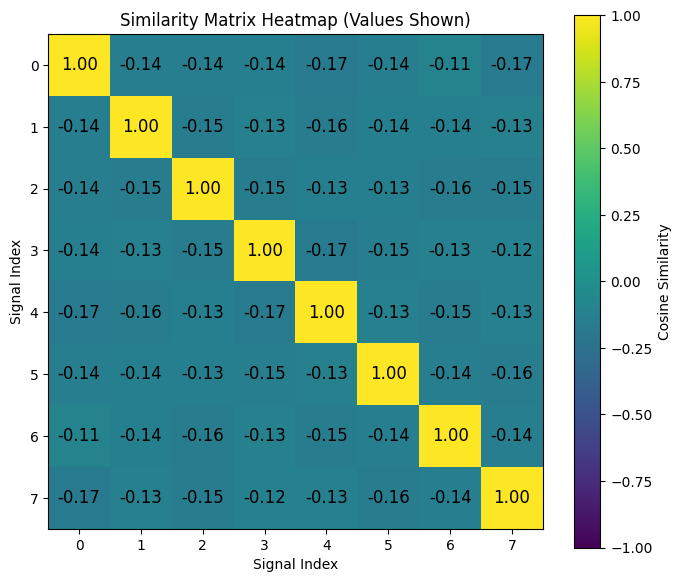

In [20]:
import os
import cv2
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

CLEAN_DIR = '/home/dongziping/WMSuite/outputs/stable_signature/clean'
WM_DIR = '/home/dongziping/WMSuite/outputs/stable_signature/default'

def load_and_calculate_residual():
    clean_files = sorted(os.listdir(CLEAN_DIR))
    signals = []
    for filename in tqdm(clean_files):
        clean_path = os.path.join(CLEAN_DIR, filename)
        wm_path = os.path.join(WM_DIR, filename)
        

        I_clean = cv2.imread(clean_path, cv2.IMREAD_COLOR)
        I_wm = cv2.imread(wm_path, cv2.IMREAD_COLOR)

        S = I_wm - I_clean
        signals.append(S)

    return signals

def analyze_signals(signals):
    V = np.array([s.flatten() for s in signals])
    pca = PCA(n_components=8)
    V_pca = pca.fit_transform(V)
    similarity_matrix = cosine_similarity(V_pca)
    N = similarity_matrix.shape[0]

    plt.figure(figsize=(7, 6))
    plt.imshow(similarity_matrix, interpolation='nearest', vmin=-1, vmax=1)
    plt.colorbar(label='Cosine Similarity')

    # 在每个像素格子内写入对应的数字
    for i in range(N):
        for j in range(N):
            value = similarity_matrix[i, j]
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', fontsize=12, color='black')

    plt.title("Similarity Matrix Heatmap (Values Shown)")
    plt.xlabel("Signal Index")
    plt.ylabel("Signal Index")
    plt.tight_layout()
    plt.show()

    return similarity_matrix

signals = load_and_calculate_residual()



similarity_matrix = analyze_signals(signals)

